## `Follow along in this notebook to see the creation process of Figure 1: Species Diversity`

### `We will first import any packages needed`

In [34]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt

### `We can now load in and preview the data`

In [35]:
cfh = 'F:\\Research\\Funded\\UIREEJ\\Data\\Catch.pkl'
catch = pd.read_pickle(cfh)
# catch[['Fish', 'Site', '_Site', '_Species']].head(15)

### `Simplify `

In [36]:
catch['_Species'].replace("Common carp", "Carp", inplace=True) 
catch['_Species'].replace("Mirror Carp", "Carp", inplace=True)

### `Seperate up and down Stream`

In [37]:
down = catch.loc[catch['Site'].isin([1.0,3.0])]
down_df = down.groupby(down.loc[:,'_Species']).size()
down_df.name = 'down'
up = catch.loc[catch['Site'].isin([2.0,4.0])]
up_df = up.groupby(up.loc[:,'_Species']).size()
up_df.name = 'up'

### `Combine`

In [38]:
metadata = pd.merge(down_df, up_df, how='outer', left_index=True, right_index=True)
metadata.drop('Unknown', inplace=True)

In [39]:
metadata.index

Index(['Bigmouth Buffalo', 'Black Bullhead', 'Black Crappie', 'Bluegill',
       'Bowfin', 'Brown Bullhead', 'Channel Catfish', 'Common Carp',
       'Common Shiner', 'Emerald Shiner', 'Freshwater Drum', 'Gizzard Shad',
       'Goldfish', 'Green Sunfish', 'Largemouth Bass', 'Longnose Gar',
       'Northern Logperch', 'Northern Pike', 'Pumpkinseed Sunfish',
       'Quillback', 'Redhorse', 'Rock Bass', 'Round Goby', 'Smallmouth Bass',
       'Walleye', 'Warmouth', 'White Bass', 'White Crappie', 'White Perch',
       'White Sucker', 'Yellow Bullhead', 'Yellow Perch'],
      dtype='object', name='_Species')

### `Define some UM COLORS`

In [41]:
ummaize = '#FFCB05'
umblue = '#00274C'
umgrey = '#989C97'
rossorange = '#D86018'
tappanred = '#9A3324'
rackhamgreen = '#75988d'
wavefieldgreen = '#A5A508'

### `Add in feeding Niches`

In [42]:
niche_dict = {
    "Bigmouth Buffalo"    : "Planktivore",
    "Black Bullhead"      : "Benthivore",
    "Black Crappie"       : "Planktivore",
    "Bluegill"            : "Planktivore",
    "Bowfin"              : "Piscivore",
    "Brown bullhead"      : "Benthivore",
    "Carp"                : "Benthivore",
    "Channel Catfish"     : "Benthivore",
    "Common Shiner"       : "Planktivore",
    "Emerald Shiner"      : "Planktivore",
    "Freshwater Drum"     : "Benthivore",
    "Gizzard Shad"        : "Planktivore",
    "Goldfish"            : "Planktivore",
    "Green Sunfish"       : "Piscivore",
    "Largemouth Bass"     : "Piscivore",
    "Longnose Gar"        : "Piscivore",
    "Northern Logperch"   : "Planktivore",
    "Northern Pike"       : "Piscivore",
    "Pumpkinseed Sunfish" : "Planktivore",
    "Quillback"           : "Benthivore",
    "Redhorse"            : "Benthivore",
    "Rock Bass"           : "Planktivore",
    "Round Goby"          : "Benthivore",
    "Smallmouth Bass"     : "Piscivore",
    "Walleye"             : "Piscivore",
    "Warmouth"            : "Piscivore",
    "White Crappie"       : "Planktivore",
    "White Perch"         : "Piscivore",
    "White Bass"          : "Piscivore",
    "White Sucker"        : "Benthivore",
    "Yellow Bullhead"     : "Benthivore",
    "Yellow Perch"        : "Piscivore",
}

metadata['Feeding'] = [niche_dict[x] for x in metadata.index]

color_dict = {
    "Piscivore" : tappanred,
    "Planktivore" : ummaize, 
    "Benthivore" : umblue,
}

metadata['Color'] = metadata['Feeding'].apply(lambda x: color_dict[x])

### `Some Plot Formatting`

In [43]:
matplotlib.rcParams['font.family'] = 'calibri'
matplotlib.rcParams['axes.titlecolor'] = 'black'
matplotlib.rcParams['axes.titlesize'] = 43
matplotlib.rcParams['axes.titlepad'] = 15
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['axes.labelsize'] = 30
matplotlib.rcParams['axes.labelweight'] = 'bold'
matplotlib.rcParams['axes.labelpad'] = 25
matplotlib.rcParams['axes.xmargin'] = .75
matplotlib.rcParams['axes.ymargin'] = .025
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.formatter.use_mathtext'] = True
matplotlib.rcParams['xtick.labelsize'] = 24
matplotlib.rcParams['ytick.labelsize'] = 24
matplotlib.rcParams['legend.fontsize'] = 24
matplotlib.rcParams['legend.labelspacing'] = 0.8
matplotlib.rcParams['legend.framealpha'] = 0
matplotlib.rcParams['text.usetex'] = True

Note: you will need a $\LaTeX$ distribution installed

### `Make the Plot`

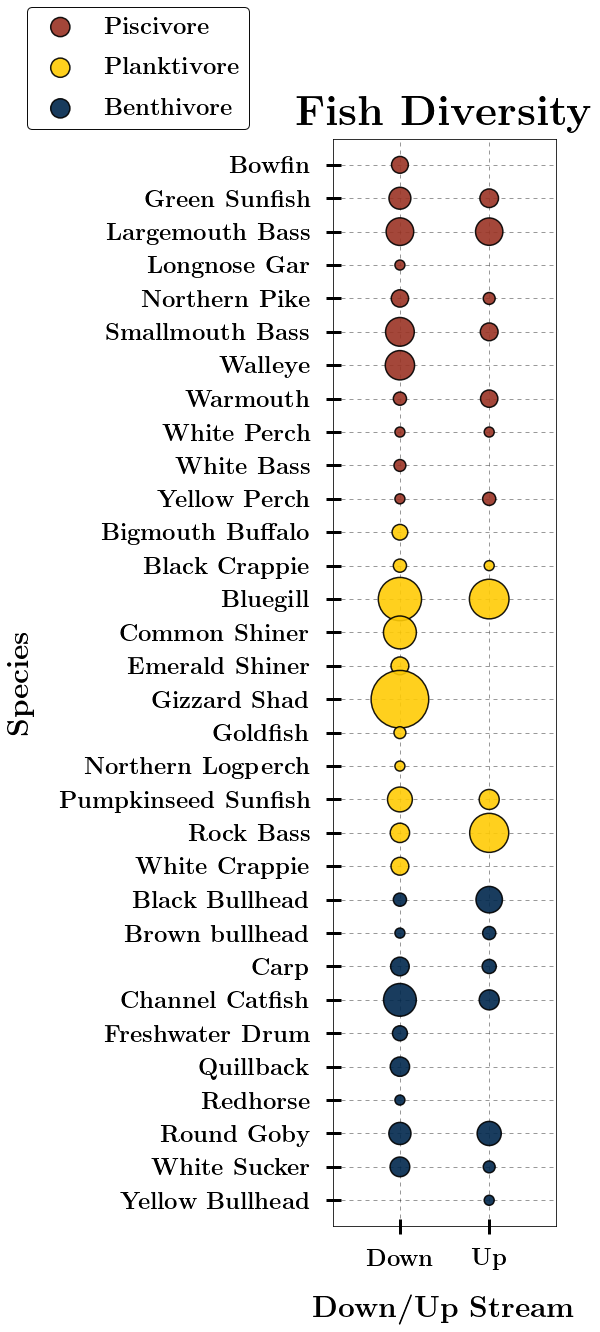

In [44]:
plt.tick_params(direction='inout',axis='both', pad=15, width=3, length=15, color='black')
plt.grid(dashes=[5, 5], animated=True, alpha=.5, c='black', zorder=3)
plt.xticks(rotation=0, ha='center')
plt.title(r'\textbf{Fish Diversity}', style='oblique')
plt.xlabel(r'\textbf{Down/Up Stream}', style='italic')
plt.ylabel(r'\textbf{Species}', style='italic')


# Bubble Scales
import math
metadata_T = metadata.copy()
metadata.down = 100*metadata.down.apply(lambda x: math.sqrt(x))
metadata.up = 100*metadata.up.apply(lambda x: math.sqrt(x))

# X 
metadata['Above'] = r'\textbf{Up}'
metadata['Below'] = r'\textbf{Down}'

# PLOT
mask1 = metadata["Feeding"] == "Piscivore"
mask2 = metadata["Feeding"] == "Planktivore"
mask3 = metadata["Feeding"] == "Benthivore"

up_mask = metadata["up"] > 0
down_mask = metadata["down"] > 0

plt.scatter(metadata['Below'][down_mask & mask1], [r"\textbf{" + str(fish) + r"}" for fish in metadata.index[down_mask & mask1]], s=metadata.down[down_mask & mask1], alpha=.9 , c=metadata['Color'][down_mask & mask1], marker='o',edgecolor='black', linewidth=1.5, zorder=2)
plt.scatter(metadata['Above'][up_mask & mask1], [r"\textbf{" + str(fish) + r"}" for fish in metadata.index[up_mask & mask1]], s=metadata.up[up_mask & mask1], alpha=.9, c=metadata['Color'][up_mask & mask1], label=r"\textbf{Piscivore}", marker='o', edgecolor='black', linewidth=1.5, zorder=2)

plt.scatter(metadata['Below'][down_mask & mask2], [r"\textbf{" + str(fish) + r"}" for fish in metadata.index[down_mask & mask2]], s=metadata.down[down_mask & mask2], alpha=.9 , c=metadata['Color'][down_mask & mask2], marker='o',edgecolor='black', linewidth=1.5, zorder=2)
plt.scatter(metadata['Above'][up_mask & mask2], [r"\textbf{" + str(fish) + r"}" for fish in metadata.index[up_mask & mask2]], s=metadata.up[up_mask & mask2], alpha=.9, c=metadata['Color'][up_mask & mask2], label=r"\textbf{Planktivore}", marker='o', edgecolor='black', linewidth=1.5, zorder=2)

plt.scatter(metadata['Below'][down_mask & mask3], [r"\textbf{" + str(fish) + r"}" for fish in metadata.index[down_mask & mask3]], s=metadata.down[down_mask & mask3], alpha=.9 , c=metadata['Color'][down_mask & mask3], marker='o',edgecolor='black', linewidth=1.5, zorder=2)
plt.scatter(metadata['Above'][up_mask & mask3], [r"\textbf{" + str(fish) + r"}" for fish in metadata.index[up_mask & mask3]], s=metadata.up[up_mask & mask3], alpha=.9, c=metadata['Color'][up_mask & mask3], label=r"\textbf{Benthivore}", marker='o', edgecolor='black', linewidth=1.5, zorder=2)

plt.gca().invert_yaxis()

# SCALE
fig = plt.gcf()
fig.set_size_inches(4, 20)

# LEGEND
legend = fig.legend(loc=2, frameon=True, edgecolor="black", fancybox=True, framealpha=0.95, bbox_to_anchor=(-0.98, 0.98))
for legend_handle in legend.legendHandles:
    legend_handle.set_sizes([369,369,369,369])

# SHOW
plt.savefig('F:\\Research\\Funded\\UIREEJ\\Flint_River_Ecology\\Poster\\Img\\Diversity_Bubble_Plot.png', dpi=100, bbox_inches='tight')
plt.show()

In [46]:
matplotlib.rcParams['font.family'] = 'calibri'
matplotlib.rcParams['axes.titlecolor'] = 'black'
matplotlib.rcParams['axes.titlesize'] = 43
matplotlib.rcParams['axes.titlepad'] = 15
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['axes.labelsize'] = 30
matplotlib.rcParams['axes.labelweight'] = 'bold'
matplotlib.rcParams['axes.labelpad'] = 25
matplotlib.rcParams['axes.xmargin'] = .025
matplotlib.rcParams['axes.ymargin'] = .75
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.formatter.use_mathtext'] = True
matplotlib.rcParams['xtick.labelsize'] = 24
matplotlib.rcParams['ytick.labelsize'] = 24
matplotlib.rcParams['legend.fontsize'] = 24
matplotlib.rcParams['legend.labelspacing'] = 0.8
matplotlib.rcParams['legend.framealpha'] = 0
matplotlib.rcParams['text.usetex'] = True

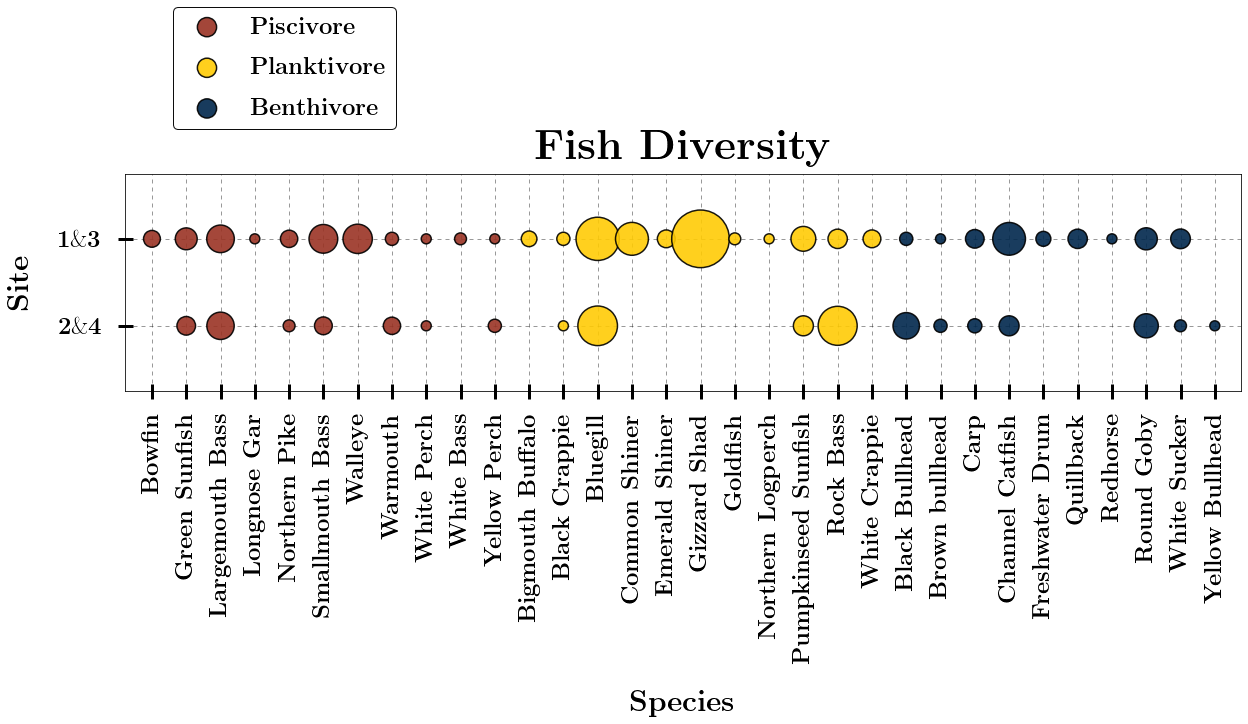

In [47]:
plt.tick_params(direction='inout',axis='both', pad=15, width=3, length=15, color='black')
plt.grid(dashes=[5, 5], animated=True, alpha=.5, c='black', zorder=3)
plt.xticks(rotation=90, ha='center')
# plt.xticks(rotation=45, ha='right')
plt.title(r'\textbf{Fish Diversity}', style='oblique')
plt.ylabel(r'\textbf{Site}', style='italic')
plt.xlabel(r'\textbf{Species}', style='italic')


# Bubble Scales
metadata_T.down = 100*metadata_T.down.apply(lambda x: math.sqrt(x))
metadata_T.up = 100*metadata_T.up.apply(lambda x: math.sqrt(x))

# Y 
metadata_T['Above'] = r'$\mathbf{2 \& 4}$'
metadata_T['Below'] = r'$\mathbf{1 \& 3}$'

# PLOT
mask1 = metadata_T["Feeding"] == "Piscivore"
mask2 = metadata_T["Feeding"] == "Planktivore"
mask3 = metadata_T["Feeding"] == "Benthivore"

up_mask = metadata_T["up"] > 0
down_mask = metadata_T["down"] > 0

plt.scatter([r"\textbf{" + str(fish) + r"}" for fish in metadata_T.index[down_mask & mask1]], metadata_T['Below'][down_mask & mask1], s=metadata_T.down[down_mask & mask1], alpha=.9 , c=metadata_T['Color'][down_mask & mask1], marker='o',edgecolor='black', linewidth=1.5, zorder=2)
plt.scatter([r"\textbf{" + str(fish) + r"}" for fish in metadata_T.index[up_mask & mask1]], metadata_T['Above'][up_mask & mask1], s=metadata_T.up[up_mask & mask1], alpha=.9, c=metadata_T['Color'][up_mask & mask1], label=r"\textbf{Piscivore}", marker='o', edgecolor='black', linewidth=1.5, zorder=2)

plt.scatter([r"\textbf{" + str(fish) + r"}" for fish in metadata_T.index[down_mask & mask2]], metadata_T['Below'][down_mask & mask2], s=metadata_T.down[down_mask & mask2], alpha=.9 , c=metadata_T['Color'][down_mask & mask2], marker='o',edgecolor='black', linewidth=1.5, zorder=2)
plt.scatter([r"\textbf{" + str(fish) + r"}" for fish in metadata_T.index[up_mask & mask2]], metadata_T['Above'][up_mask & mask2], s=metadata_T.up[up_mask & mask2], alpha=.9, c=metadata_T['Color'][up_mask & mask2], label=r"\textbf{Planktivore}", marker='o', edgecolor='black', linewidth=1.5, zorder=2)

plt.scatter([r"\textbf{" + str(fish) + r"}" for fish in metadata_T.index[down_mask & mask3]], metadata_T['Below'][down_mask & mask3], s=metadata_T.down[down_mask & mask3], alpha=.9 , c=metadata_T['Color'][down_mask & mask3], marker='o',edgecolor='black', linewidth=1.5, zorder=2)
plt.scatter([r"\textbf{" + str(fish) + r"}" for fish in metadata_T.index[up_mask & mask3]], metadata_T['Above'][up_mask & mask3], s=metadata_T.up[up_mask & mask3], alpha=.9, c=metadata_T['Color'][up_mask & mask3], label=r"\textbf{Benthivore}", marker='o', edgecolor='black', linewidth=1.5, zorder=2)

plt.gca().invert_yaxis()

# SCALE
fig = plt.gcf()
fig.set_size_inches(20, 4)

# LEGEND
legend = fig.legend(loc=2, frameon=True, edgecolor="black", fancybox=True, framealpha=0.95, bbox_to_anchor=(0.15, 1.5))
for legend_handle in legend.legendHandles:
    legend_handle.set_sizes([369,369,369,369])

# SHOW
plt.savefig('F:\\Research\\Funded\\UIREEJ\\Flint_River_Ecology\\Poster\\Img\\Diversity_Bubble_Plot_T.png', dpi=100, bbox_inches='tight')
plt.show()